In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
df = pd.read_csv("movies.csv",encoding ='latin1')

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [19]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


# Analyzing Movies From the Past 31 Years

Thousands of movies have been released over the past 30+ years. Some have performed poorly,  some have received rewards, and some have been just okay. They play a large role in our culture and there are a number of questions we could attempt to answer about one of these nearly 7000 movies, but we will be focusing on 3:

**Does budget play a role in movie scores? What factors affect their gross? What factors cause a higher movie score?**

### Does Budget Play a Role in Movie Scores?

To answer our first question, let's begin by taking a look at the generally budget of films. (Unfortunately, a large portion of film budgets were unprovided or unknown. As such, any portion of this analysis relating to budget has had these ~2000 movies removed.)

In [22]:
df_budget = df[df.budget !=0]

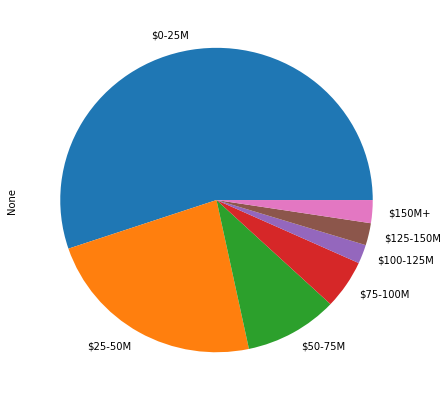

In [20]:
#budget pie chart
df['bins'] = pd.cut(df['budget'],bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,300000000], labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])
pie_budget = df.groupby('bins').size()
pie_budget.plot.pie(figsize=(7,7))
plt.show()

You can see from the pie chart that more than half of movie have a budget less than \$25 million, nearly a quarter receive \$25-50 million, and only a small portion use a budget greater than \$150 million.

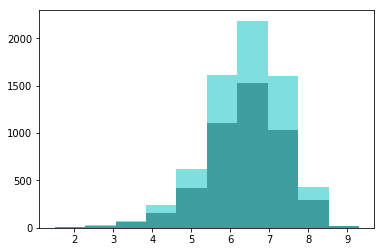

In [6]:
#histogram of scores including vs excluding movies without budget provided
plt.hist(df_budget['score'], alpha =.5, color = 'black')
plt.hist(df['score'], alpha = .5, color = 'c')
plt.show()

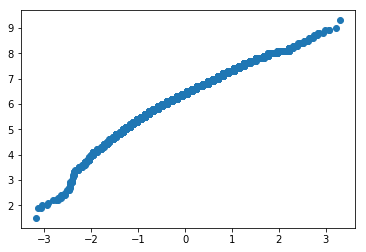

In [36]:
#QQ plot of scores w/ budgets
normal = np.random.normal(0, 1, 4638)
normal.sort()
df_budget = df_budget.sort_values(by = 'score')
plt.plot(normal, df_budget['score'], "o") 
plt.show() 

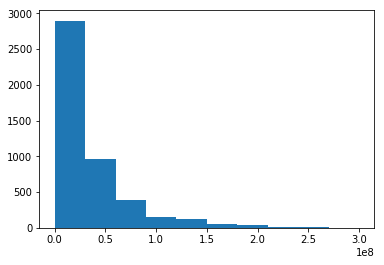

In [7]:
plt.hist(df_budget['budget'])
plt.show()

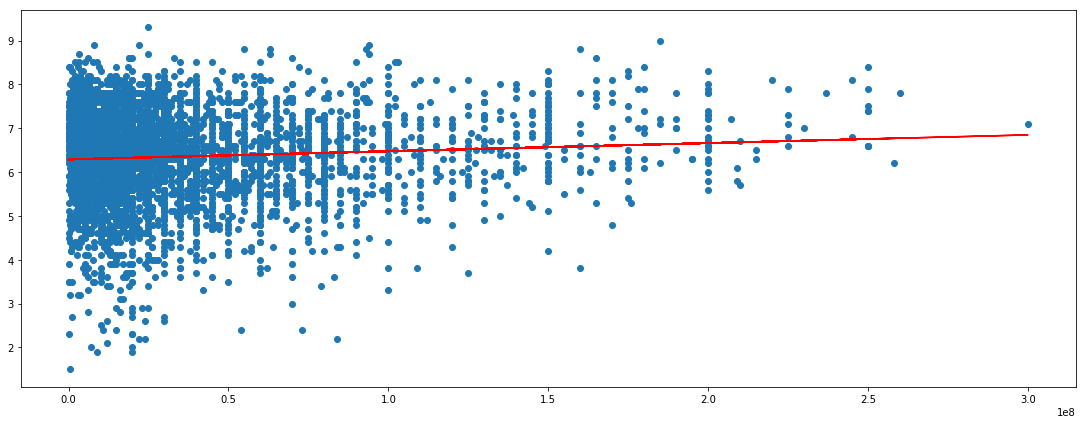

In [8]:
#budget/score scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["score"])

x= df_budget["budget"]
y = df_budget["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()

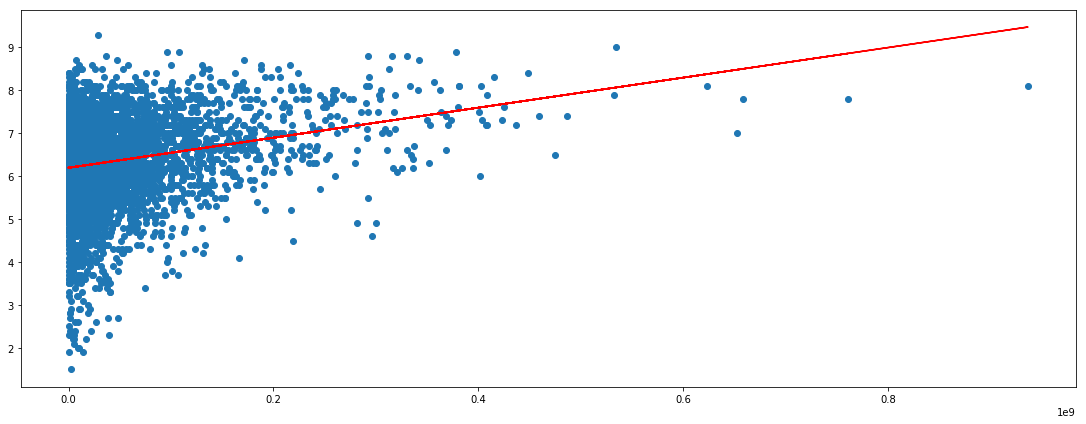

In [10]:
#gross/score scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["gross"], df_budget["score"])

x= df_budget["gross"]
y = df_budget["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()

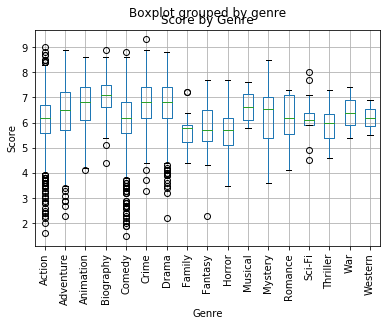

In [11]:
#genre/score boxplot
df.boxplot(column = 'score', by = 'genre')
plt.title("Score by Genre")
plt.ylabel('Score')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

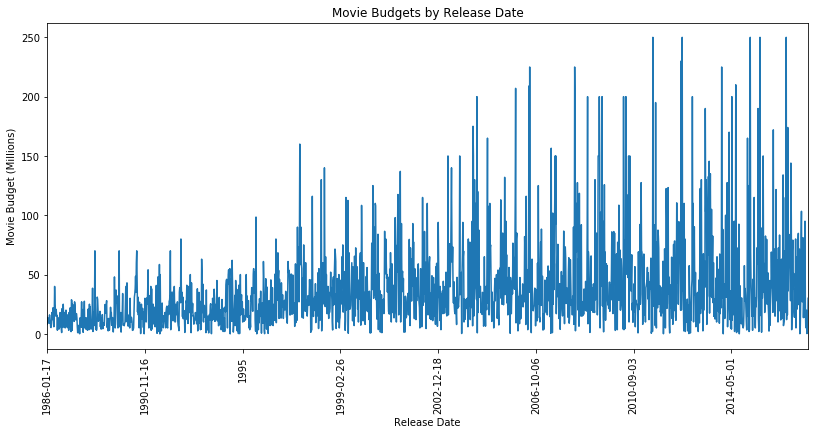

In [12]:
#release date/budget
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df_budget.groupby('released').budget.mean().plot(kind = "line")
plt.xlabel('Release Date')
plt.ylabel('Movie Budget (Millions)')
plt.title('Movie Budgets by Release Date')
tick_val = [0, 50000000, 100000000, 150000000, 200000000, 250000000]
tick_lab = ['0','50', '100', '150', '200', '250'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

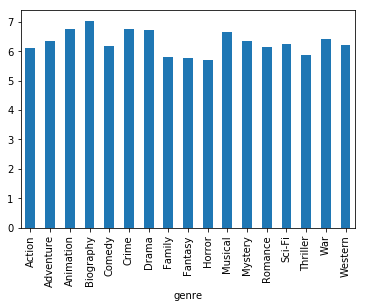

In [13]:
#genre/score
df.groupby('genre').score.mean().plot(kind = "bar")
plt.show()

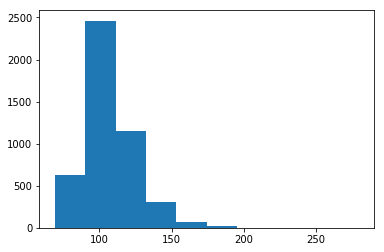

In [14]:
plt.hist(df_budget['runtime'])
plt.show()

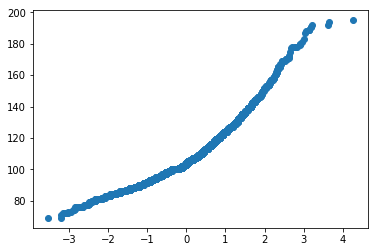

In [15]:
'''
Having removed 7 outerliers: Until the End of the World, Gettysburg, Hamlet, Lagaan: Once Upon a Time in India, 
Gods and Generals, Malcom X, and The Lord of the Rings: The Return of the king.
All exceeding 200 minutes of runtime.
'''
norm = np.random.normal(0, 1, 4631)
norm.sort()
df_by_runtime = df_budget.sort_values(by = 'runtime')
df_by_runtime = df_by_runtime[df_by_runtime.runtime <200]
plt.plot(norm, df_by_runtime['runtime'], "o") 
plt.show() 

In [41]:
df_stars = df_budget.star.value_counts().reset_index().rename(columns={'index': 'star', 'star': 'count'})
df_stars = df_stars[df_stars['count']>19]
print(df_stars)

                     star  count
0            Nicolas Cage     38
1            Bruce Willis     33
2          Robert De Niro     32
3               Tom Hanks     31
4       Denzel Washington     31
5             Johnny Depp     30
6            Adam Sandler     27
7              Tom Cruise     27
8             Ben Stiller     25
9      Sylvester Stallone     25
10           Eddie Murphy     25
11          Kevin Costner     24
12           Keanu Reeves     23
13              Brad Pitt     22
14         George Clooney     22
15             Matt Damon     22
16             Jim Carrey     22
17          Mark Wahlberg     22
18         Robin Williams     22
19  Arnold Schwarzenegger     22
20            Ben Affleck     21
21    Matthew McConaughey     21
22          Harrison Ford     20
23          John Travolta     20
24            John Cusack     20
25             Mel Gibson     20
26             Will Smith     20


In [71]:
df_writers = df_budget.writer.value_counts().reset_index().rename(columns={'index': 'writer', 'writer': 'count'})
df_writers = df_writers[df_writers['count']>6]
print(df_writers)

                  writer  count
0            Woody Allen     29
1           Stephen King     20
2            John Hughes     14
3             Luc Besson     13
4             Wes Craven     12
5       Robert Rodriguez     11
6              Joel Coen     11
7            Kevin Smith     10
8           Ehren Kruger     10
9      Quentin Tarantino     10
10   William Shakespeare     10
11      Michael Crichton     10
12    M. Night Shyamalan     10
13          John Grisham      9
14       Brian Helgeland      9
15             Spike Lee      8
16            John Logan      8
17       Lilly Wachowski      8
18        Leigh Whannell      7
19           Tyler Perry      7
20          Dan Fogelman      7
21            Allan Loeb      7
22        Patrick Melton      7
23         John Lasseter      7
24  Paul Thomas Anderson      7
25    Paul W.S. Anderson      7
26      Gene Roddenberry      7
27            Fran Walsh      7
28           David Twohy      7
29              Bob Kane      7
30     R

In [65]:
df2 = df.groupby['star'].mean()['score']

TypeError: 'method' object is not subscriptable